# HW11_met414

# Assignment 1

In [2]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import seaborn as sns
import os

In [3]:
# Dowloading data via curl- move to PUIDATA folder
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip")
os.system("mv " + "nycb2010_16d.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/nycb2010_16d.zip")
os.system("mv " + "nycb2010_16d/ " + os.getenv("PUIDATA"))

0

In [4]:
# Bringing in shape file
shape_path = os.getenv('PUIDATA') + "/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.crs = from_epsg(2263)

ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [9]:
#filter for only Brooklyn polygons and convert to epsg 4326 for lat/lon
#https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/
# GeospatialAnalysis_CitiBike.ipynb
ct_latlon = ct_shape[ct_shape.BoroName == "Brooklyn"]
ct_latlon = ct_latlon.to_crs(epsg=4326)

ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [10]:
#Cusp/1Metrotech lat/long point from GoogleMAps
cusp_geo = shapely.geometry.Point(-73.9888305, 40.6931259)

In [11]:
cuspgeo_index = 0
for i, ct in zip(ct_latlon.index, ct_latlon.geometry):
    if shapely.geometry.asShape(ct).contains(cusp_geo):
        print 'CUSP is contained in',ct
        cuspgeo_index = i

CUSP is contained in POLYGON ((-73.98716132813911 40.69496169586319, -73.98720083280509 40.6942679880677, -73.98722751058246 40.69379951950234, -73.98725396415627 40.6931249027317, -73.98729894947923 40.69223407539822, -73.98818594276516 40.69227701684913, -73.98875073043592 40.69229640711011, -73.98889162251962 40.6923012470929, -73.98897455556948 40.69230552383393, -73.98897091388419 40.69243721409796, -73.98897206315063 40.69249619876403, -73.98895154976945 40.69284970172215, -73.98888135194944 40.69434605001802, -73.98887818530989 40.69441356156402, -73.98886115711706 40.69472847985681, -73.98884531151906 40.69502153056919, -73.98875574890583 40.69501835106358, -73.98861349022471 40.69501329500623, -73.98716132813911 40.69496169586319))


In [12]:
print cuspgeo_index

35380


In [13]:
CUSP_cb = ct_latlon[ct_latlon.index == cuspgeo_index]
CUSP_cb

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
35380,30011001002,3,Brooklyn,1002,001100,462604.348339,2917.605512,POLYGON ((-73.98716132813911 40.69496169586319...


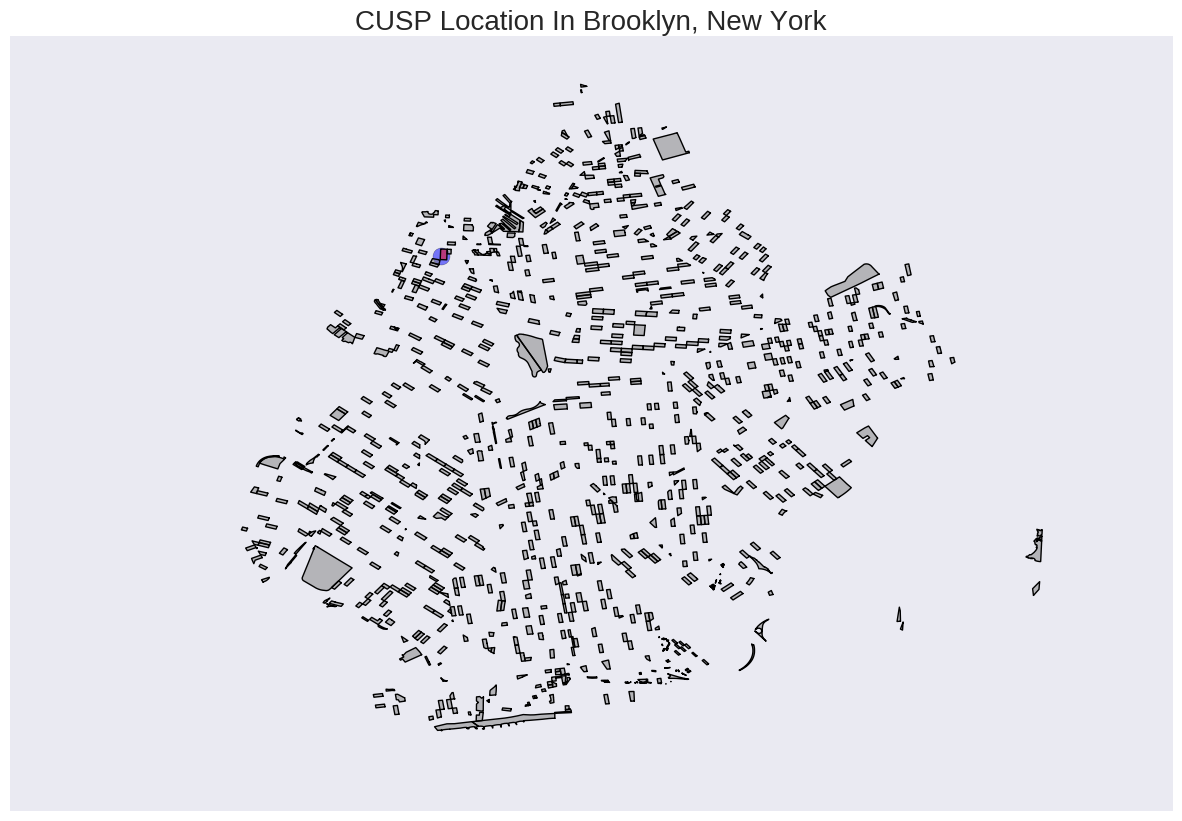

In [14]:
f, ax = plt.subplots(figsize = (15, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlon[::10].plot(ax = ax, color = "grey")
CUSP_cb.plot(ax=ax, color="red")
plt.scatter(cusp_geo.x, cusp_geo.y, s = 150, alpha=0.5)
plt.title("CUSP Location In Brooklyn, New York", fontsize = 20)
plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)

# Figure 1. Census Tract Map of Brooklyn, Metrotech Featured
#### Above is a map of Brooklyn, NY limited to only Census Tracts. In the upper lefthand corner, CUSP located at 1 Metrotech in Brooklyn is highlighted in pink and blue